<a href="https://colab.research.google.com/github/hadismohammadi/carla-adas/blob/main/traffic_light_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --quiet


In [ ]:
from fastai.vision.all import *
from pathlib import Path
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = Path("/content/drive/My Drive/Objects/traffic_light_data")

In [ ]:
traffic_light_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='train', valid_name='val'),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)


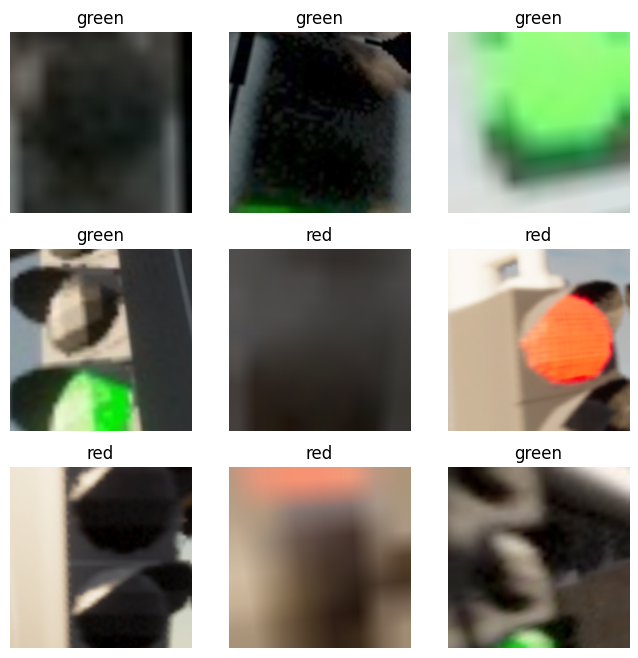

In [ ]:
dls = traffic_light_datablock.dataloaders(data_path)
dls.show_batch(max_n=9, figsize=(8, 8))

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 153MB/s]


In [ ]:
learn.fine_tune(30)

model_path = Path("/content/traffic_light_classifier.pkl")
learn.export(model_path)
shutil.copy(model_path, "/content/drive/My Drive/")

epoch,train_loss,valid_loss,accuracy,time
0,1.121463,0.217991,0.921671,12:38


epoch,train_loss,valid_loss,accuracy,time
0,0.374705,0.117016,0.955614,17:44
1,0.309838,0.083976,0.971279,17:46
2,0.238377,0.097234,0.966057,17:15
3,0.209448,0.123366,0.963446,17:28
4,0.171033,0.108191,0.968668,17:25
5,0.153071,0.093002,0.963446,17:26
6,0.138686,0.184028,0.945170,17:23
7,0.123547,0.113928,0.971279,17:22
8,0.130473,0.152503,0.958225,17:26
9,0.122526,0.065205,0.976501,17:20


'/content/drive/My Drive/traffic_light_classifier.pkl'